#### 3. Thực hiện lại các hướng dẫn từ trang 69 đến 76 để hiểu rõ cách cài đặt thực nghiệm bài toán hồi quy với các giải thuật khác nhau.

In [1]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

/home/toandokhanh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
from sklearn.datasets import load_boston
X,y = load_boston(return_X_y = True)
print(X.shape)

(506, 13)


/home/toandokhanh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [5]:
import pandas as pd
df =pd.read_csv(r'Customers.csv')

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
#random_state=1 đảm bảo lập lại kế quả để kiểm định
print('Sample train')
print(X_train.shape)
print('Sample test')
print(X_test.shape)

Sample train
(404, 13)
Sample test
(102, 13)


### HỒI QUY TUYẾN TÍNH

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) # huẩn luyện model

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_train_pred = regr.predict(X_train)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = regr.predict(X_test)
print('Test: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Test: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: mean squared error =  21.86279471487961
Train: Mean absolute error =  3.196196807325735
Test: mean squared error =  23.380836480270144
Test: Mean absolute error =  3.750712180838911


=> Độ lỗi của tập train thấp hơn tập test (gần bằng nên đáng tin cậy)

### SVM

In [16]:
from sklearn import svm
svm_regr = svm.SVR()
svm_regr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = svm_regr.predict(X_train)
print('Train: Mean squared error = ', mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = svm_regr.predict(X_test)
print('Test: Mean squared error = ', mean_squared_error(y_test,y_test_pred))
print('Test: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: Mean squared error =  63.110980896358605
Train: Mean absolute error =  5.22581845195294
Test: Mean squared error =  80.88313574924172
Test: Mean absolute error =  5.521848058473931


=> Độ lỗi của tập train thấp hơn tập test

### K láng giềng

In [18]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = neigh.predict(X_train)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = regr.predict(X_test)
print('Test: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Test: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: mean squared error =  12.452419554455446
Train: Mean absolute error =  2.294678217821782
Test: mean squared error =  23.380836480270144
Test: Mean absolute error =  3.750712180838911


### Cây quyết định

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(random_state=0)
dt_regr.fit (X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = dt_regr.predict(X_train)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = dt_regr.predict(X_test)
print('Train: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: mean squared error =  0.0
Train: Mean absolute error =  0.0
Train: mean squared error =  18.56470588235294
Train: Mean absolute error =  3.015686274509803


### Rừng ngẫu nhiên

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(random_state=0)
rf_regr.fit (X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = rf_regr.predict(X_train)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = rf_regr.predict(X_test)
print('Train: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

Train: mean squared error =  1.3774225569306913
Train: Mean absolute error =  0.8042004950495042
Train: mean squared error =  8.95961084313726
Train: Mean absolute error =  2.3106666666666675


### Mạng nơ-ron (CNN-1D)

(404, 13, 1)
13/13 [==============================] - 0s 940us/step
Train: mean squared error =  15.832705553099341
Train: Mean absolute error =  2.8481881023633604
4/4 [==============================] - 0s 1ms/step
Test: mean squared error =  17.42479548188512
Test: Mean absolute error =  3.117918839174159


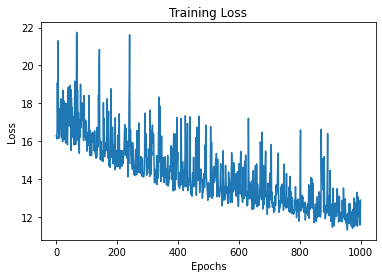

In [11]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten


model= Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))

model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshape= X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train_reshape.shape)
model.fit(X_train_reshape, y_train, batch_size=32,epochs=500,verbose=0)
# batch_size dựa trên bộ nhớ máy tính
# 
y_train_pred = model.predict(X_train_reshape)
print('Train: mean squared error = ',mean_squared_error(y_train,y_train_pred))
print('Train: Mean absolute error = ',mean_absolute_error(y_train, y_train_pred))

y_test_pred = model.predict(X_test_reshape)
print('Test: mean squared error = ',mean_squared_error(y_test,y_test_pred))
print('Test: Mean absolute error = ',mean_absolute_error(y_test, y_test_pred))

history = model.fit(X_train_reshape, y_train, batch_size=32, epochs=1000, verbose=0)

train_loss = history.history['loss']

plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
